In [ ]:
#Importing relavent libraries and data

In [ ]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

#Personal Keys Removed
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body, parse_dates=['created_date'])
df_data_1.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-05 10:29:10,45554675,DOOR/WINDOW,10016.0,500 2 AVENUE,2 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.741111,-73.978539,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-05 12:51:21,45553708,ELECTRIC,10033.0,1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848783,-73.934140,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-05 20:44:10,45554755,HEAT/HOT WATER,11216.0,815 PARK PLACE,PARK PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.673471,-73.950921,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-05 07:47:17,45553828,HEAT/HOT WATER,10003.0,332 EAST 9 STREET,EAST 9 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.728796,-73.986351,2020-02-05T17:25:20.000,RESIDENTIAL BUILDING,Closed
4,2020-02-05 18:48:25,45553886,HEAT/HOT WATER,10034.0,125 VERMILYEA AVENUE,VERMILYEA AVENUE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.866492,-73.921313,NaN,RESIDENTIAL BUILDING,Open


In [ ]:
#PersonalKeysRemoved

In [3]:
#Reuploading as a pickle file
df_data_1.to_pickle('./df_raw.pkl')
client_cred.upload_file('./df_raw.pkl',bucket,'df_raw_cos.pkl')

In [4]:
df_data_1['complaint_type'].value_counts()

HEAT/HOT WATER            1263069
HEATING                    887869
PLUMBING                   711360
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       452031
PAINT - PLASTER            361257
PAINT/PLASTER              346596
ELECTRIC                   307430
NONCONST                   260890
DOOR/WINDOW                205424
WATER LEAK                 193758
GENERAL                    151429
FLOORING/STAIRS            137462
APPLIANCE                  112932
HPD Literature Request      52830
SAFETY                      51582
OUTSIDE BUILDING             7147
ELEVATOR                     6734
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

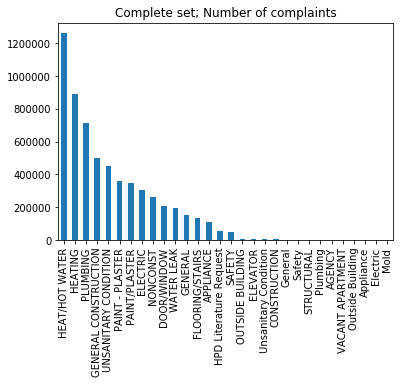

In [11]:
df_data_1['complaint_type'].value_counts().plot(kind='bar',title='Complete set; Number of complaints')


In [5]:
#From looking at the raw data at the current time, and lacking any information on costs, time and difficulty for solving the issues; heating/hot water seems to be the most prevalent problem and as
#such should be what is focused on. Arguments could be made on how other complaint types have greater severity, but you could also argue that a lack of heating can be fatal in winter months.
mask=  (df_data_1['created_date'] <= '2018-12-31')
df_data_dated=df_data_1.loc[mask]

In [6]:
df_data_dated['complaint_type'].value_counts()

HEAT/HOT WATER            1023062
HEATING                    887869
PLUMBING                   673260
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       390705
PAINT - PLASTER            361257
PAINT/PLASTER              310888
ELECTRIC                   289280
NONCONST                   260890
DOOR/WINDOW                179467
WATER LEAK                 167783
GENERAL                    132153
FLOORING/STAIRS            122804
APPLIANCE                  101910
HPD Literature Request      51600
SAFETY                      44056
OUTSIDE BUILDING             6529
ELEVATOR                     5615
CONSTRUCTION                 5078
Unsanitary Condition          141
General                        70
STRUCTURAL                     16
AGENCY                          9
Safety                          8
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

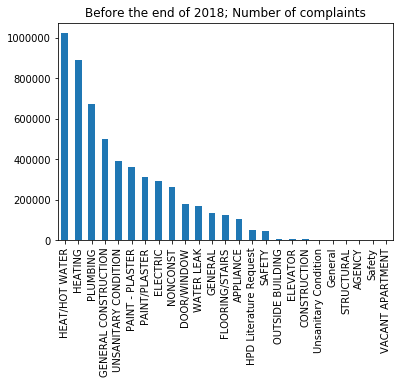

In [13]:
df_data_dated['complaint_type'].value_counts().plot(kind='bar',title='Before the end of 2018; Number of complaints')

In [ ]:
#Created an extra data set, this time limited to results before the 31/12/2018 to check for one of the written questions. Aka to see if the most common complaint was still heat related.